In [ ]:
# Populism analysis 
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


### **Stage 1: Data Cleaning and Variable Creation**

In [ ]:
# Import labelled populist data 2017
poptweets17 = pd.read_csv('/content/drive/MyDrive/Diss_data/LBLD_politician_2017_tweets.csv')
poptweets17

,Unnamed: 0,conversation_id,username,create_at,text,retweet_count,reply_count,like_count,hashtags,populist
0,0,877624914987163651,SKinnock,2017-06-21T20:30:59.000Z,it is vital that we secure a transition deal a...,7,7,5,NaN,0
1,1,877540748652150785,SKinnock,2017-06-21T14:56:33.000Z,we need full public inquiry into the scandal o...,37,4,30,#bleedingtruth #QueensSpeech,1
2,2,877209374296616960,SKinnock,2017-06-20T16:59:47.000Z,thanks much appreciated,5,0,3,NaN,0
3,3,877151434495733760,SKinnock,2017-06-20T13:09:33.000Z,we need breathing space of a #transitiondeal p...,5,0,4,#TransitionDeal #EEA,0
4,4,877146946703687680,SKinnock,2017-06-20T12:51:43.000Z,a transition deal is vital to ensure we don t ...,5,0,3,#EEA,0
...,...,...,...,...,...,...,...,...,...,...
229893,229893,861217616232411137,jamesblanchard,2017-05-07T13:54:15.000Z,an elected representative really ought to be a...,3,1,5,NaN,0
229894,229894,859512676204109828,jamesblanchard,2017-05-02T20:59:25.000Z,robert peston says this letter is worth readin...,11,0,10,NaN,0
229895,229895,859512062657081347,jamesblanchard,2017-05-02T20:56:59.000Z,robert peston says this letter is worth readin...,1,0,2,NaN,0
229896,229896,854466902927843328,jamesblanchard,2017-04-18T22:49:19.000Z,the woman who says she can get the best deal o...,0,0,2,NaN,1


In [ ]:
# Sort politicians by who tweeted most populist rhetoric
populistcount = poptweets17.groupby('username')['populist'].sum()
populistcount = populistcount.reset_index()
sorted_popcount = populistcount.sort_values(by='populist', ascending=False)
sorted_popcount

,username,populist
1478,jeremycorbyn,628
77,AngelaRayner,436
219,ChukaUmunna,422
1391,eriththamesmead,362
665,KerryanneWilde,336
...,...,...
376,Emmett_Jenner,0
373,EmmaSands4CSP,0
1677,phlipper1970,0
1077,Stacey4ppc,0


In [ ]:
# Read in General Election data
analysis_df = pd.read_csv('/content/drive/MyDrive/Diss_data/ge1719tweets_results.csv')

# Subset for 2017
analysis_17 = analysis_df[3320:]

# Merge with populist tweet data
analysis_17 = pd.merge(analysis_17,
               sorted_popcount,
               on='username',
               how='left')
analysis_17

,username,name,constituency_name,constituency_type,party_name,count,retweet,like,votes,share,female,sitting_mp,former_mp,change,year,populist
0,sadievidal,Sadie Vidal,Aberavon,County,Conservative,0,0,0,5901,0,1,0,0,0.0,2017,NaN
1,SKinnock,Stephen Kinnock,Aberavon,County,Labour,0,0,0,22662,1,0,1,1,0.0,2017,37.0
2,CenyddEU,Cen Phillips,Aberavon,County,Liberal Democrat,0,0,0,599,0,0,0,0,0.0,2017,58.0
3,bennison_andrew,Andrew Bennison,Aberavon,County,Plaid Cymru,0,0,0,2761,0,0,0,0,0.0,2017,1.0
4,NaN,Caroline Jones,Aberavon,County,UK Independence Party,0,0,0,1345,0,1,0,0,0.0,2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,NickLovesYork,Nick Love,York Central,Borough,Liberal Democrat,0,0,0,2475,0,0,0,0,0.0,2017,58.0
3300,JulianSturdy,Julian Sturdy,York Outer,County,Conservative,0,0,0,29356,1,0,1,1,0.0,2017,NaN
3301,NaN,Bethan Vincent,York Outer,County,Green,0,0,0,1094,0,1,0,0,0.0,2017,NaN
3302,lukejcr,Luke Charters-Reid,York Outer,County,Labour,0,0,0,21067,0,0,0,0,0.0,2017,NaN


In [ ]:
analysis_17.isnull().sum()

username             1075
name                    0
constituency_name       0
constituency_type       0
party_name              0
count                   0
retweet                 0
like                    0
votes                   0
share                   0
female                  0
sitting_mp              0
former_mp               0
change                340
year                    0
populist             1452
dtype: int64

In [ ]:
# Delete unneccessary column
del analysis_17['change']

In [ ]:
# Change populist to 0 if not on twitter 
analysis_17['populist'] = analysis_17['populist'].fillna(0)

In [ ]:
# Creating 'other' category for party_name variable to merge fringe parties
analysis_17.loc[analysis_17['party_name'].isin((analysis_17['party_name'].value_counts()[analysis_17['party_name'].value_counts() < 40]).index), 'party_name'] = 'Other'

In [ ]:
# Creating dummy variable for if a politician has ever tweeted something considered populist
analysis_17.loc[ analysis_17['populist'] == 0, 'populist_dummy'] = 0
analysis_17.loc[ analysis_17['populist'] != 0, 'populist_dummy'] = 1

In [ ]:
# Creating log of populist variable to achieve normal distribution
analysis_17['populist_log'] = np.log(analysis_17['populist'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Creating a vote share variable for each candidate
analysis_17['voteshare'] = (analysis_17['votes'] / analysis_17.groupby('constituency_name')['votes'].transform('sum')) * 100
analysis_17['voteshare'] = analysis_17['voteshare'].round(2)

In [ ]:
# Creating Margin of Victory column for the dataframe:

# df of constituency and voteshares
constit_and_voteshare = analysis_17[['constituency_name', 'voteshare']]

# Group by constit, then sort by voteshare
constit_top2_candidates = constit_and_voteshare.sort_values(['constituency_name', 'voteshare'],ascending=False).groupby('constituency_name').head(2)

# turn back into dataframe
constit_top2_candidates = constit_top2_candidates.reset_index()
print(type(constit_top2_candidates))

# Margin of victory = difference between top two candidates in each constituency
constit_top2_candidates['MoV'] = constit_top2_candidates.groupby('constituency_name')['voteshare'].diff()

# Keep only rows with results in
constit_top2_candidates = constit_top2_candidates.dropna()

# Keep only constituency and MoV cols
constit_top2_candidates = constit_top2_candidates[['constituency_name', 'MoV']]

# Get df back to alphabetical order
constit_top2_candidates = constit_top2_candidates[::-1]               

# Turn values from negative to positive
constit_top2_candidates['MoV'] = abs(constit_top2_candidates['MoV'])
constit_top2_candidates

<class 'pandas.core.frame.DataFrame'>


,constituency_name,MoV
1299,Aberavon,50.38
1297,Aberconwy,1.97
1295,Aberdeen North,11.26
1293,Aberdeen South,10.68
1291,Airdrie and Shotts,0.52
...,...,...
9,Wythenshawe and Sale East,32.60
7,Yeovil,24.78
5,Ynys Mon,14.07
3,York Central,34.99


In [ ]:
# Putting MoV values for each constituency back into the dataset
analysis_17 = pd.merge(analysis_17,
               constit_top2_candidates,
               on='constituency_name',
               how='inner')

analysis_17['MoV'] = analysis_17['MoV'].round(2)

In [ ]:
# Who are the 1075?
analysis_17.isnull().sum()

username             1075
name                    0
constituency_name       0
constituency_type       0
party_name              0
count                   0
retweet                 0
like                    0
votes                   0
share                   0
female                  0
sitting_mp              0
former_mp               0
year                    0
populist                0
populist_dummy          0
populist_log            0
voteshare               0
MoV                     0
dtype: int64

In [ ]:
#drop rows with missing values for populist
analysis_17 = analysis_17.dropna()

In [ ]:
# FINAL POLITICIAN LEVEL DF
analysis_17

,username,name,constituency_name,constituency_type,party_name,count,retweet,like,votes,share,female,sitting_mp,former_mp,year,populist,populist_dummy,populist_log,voteshare,MoV
0,sadievidal,Sadie Vidal,Aberavon,County,Conservative,0,0,0,5901,0,1,0,0,2017,0.0,0.0,-inf,17.74,50.38
1,SKinnock,Stephen Kinnock,Aberavon,County,Labour,0,0,0,22662,1,0,1,1,2017,37.0,1.0,3.610918,68.12,50.38
2,CenyddEU,Cen Phillips,Aberavon,County,Liberal Democrat,0,0,0,599,0,0,0,0,2017,58.0,1.0,4.060443,1.80,50.38
3,bennison_andrew,Andrew Bennison,Aberavon,County,Plaid Cymru,0,0,0,2761,0,0,0,0,2017,1.0,1.0,0.000000,8.30,50.38
5,GutoAberconwy,Guto Bebb,Aberconwy,County,Conservative,0,0,0,14337,0,0,1,1,2017,0.0,0.0,-inf,44.59,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,RachaelMaskell,Rachael Maskell,York Central,Borough,Labour and Co-operative,0,0,0,34594,1,1,1,1,2017,61.0,1.0,4.110874,65.16,34.99
3299,NickLovesYork,Nick Love,York Central,Borough,Liberal Democrat,0,0,0,2475,0,0,0,0,2017,58.0,1.0,4.060443,4.66,34.99
3300,JulianSturdy,Julian Sturdy,York Outer,County,Conservative,0,0,0,29356,1,0,1,1,2017,0.0,0.0,-inf,51.12,14.44
3302,lukejcr,Luke Charters-Reid,York Outer,County,Labour,0,0,0,21067,0,0,0,0,2017,0.0,0.0,-inf,36.68,14.44


In [ ]:
# CREATING A DATAFRAME FOR CONSTITUENCY LEVEL ANALYSIS
constituency_df = analysis_17[['constituency_name', 'constituency_type', 'MoV']]
constituency_df = constituency_df.drop_duplicates()
constituency_df

,constituency_name,constituency_type,MoV
0,Aberavon,County,50.38
5,Aberconwy,County,1.97
9,Aberdeen North,Borough,11.26
14,Aberdeen South,Borough,10.68
19,Airdrie and Shotts,County,0.52
...,...,...,...
3281,Wythenshawe and Sale East,Borough,32.60
3287,Yeovil,County,24.78
3292,Ynys Mon,County,14.07
3298,York Central,Borough,34.99


In [ ]:
# Create total populist rhetoric per constituency variable
constit_populism = analysis_17.groupby('constituency_name')['populist'].sum()
constit_populism = constit_populism.reset_index()
constit_populism = constit_populism.sort_values(by='populist', ascending=False)

In [ ]:
# Add total populist rhetoric variable to constituency_df
constituency_df = pd.merge(constituency_df,
               constit_populism,
               on='constituency_name',
               how='inner')

In [ ]:
# Find the winner of each constituency
constit_party_votes = analysis_17[['constituency_name', 'party_name', 'voteshare']]

# Group by constit, then sort by voteshare
constit_winner = constit_party_votes.sort_values(['constituency_name', 'voteshare'],ascending=False).groupby('constituency_name').head(1)

In [ ]:
constituency_df = pd.merge(constituency_df,
               constit_winner,
               on='constituency_name',
               how='inner')

constituency_df['winning_party'] = constituency_df['party_name']
del constituency_df['party_name']

In [ ]:
# Log of constituency populist variable
constituency_df['populist_log'] = np.log(constituency_df['populist'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Categorical variable for whether a constituency is competitive
constituency_df['competition'] = 'Moderate'
constituency_df.loc[ constituency_df['MoV'] > 40, 'competition'] = 'Safe'
constituency_df.loc[ constituency_df['MoV'] < 10, 'competition'] = 'Competitive'

In [ ]:
# FINAL CONSTITUENCY LEVEL DF
constituency_df

,constituency_name,constituency_type,MoV,populist,voteshare,winning_party,populist_log,competition
0,Aberavon,County,50.38,96.0,68.12,Labour,4.564348,Safe
1,Aberconwy,County,1.97,66.0,44.59,Conservative,4.189655,Competitive
2,Aberdeen North,Borough,11.26,75.0,41.27,Scottish National Party,4.317488,Moderate
3,Aberdeen South,Borough,10.68,61.0,42.13,Conservative,4.110874,Moderate
4,Airdrie and Shotts,County,0.52,18.0,37.61,Scottish National Party,2.890372,Competitive
...,...,...,...,...,...,...,...,...
643,Wythenshawe and Sale East,Borough,32.60,22.0,62.22,Labour,3.091042,Moderate
644,Yeovil,County,24.78,28.0,54.49,Conservative,3.332205,Moderate
645,Ynys Mon,County,14.07,7.0,41.86,Labour,1.945910,Moderate
646,York Central,Borough,34.99,119.0,65.16,Labour and Co-operative,4.779123,Moderate


### **Stage 2: Descriptive Statistics**

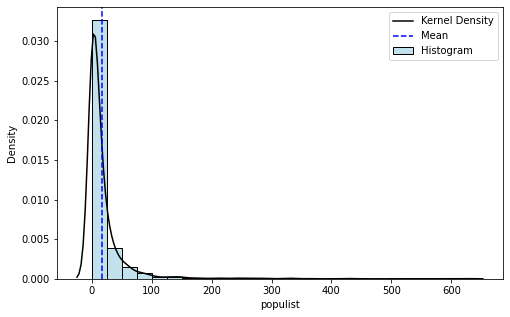

In [ ]:
# EDA OF POPULIST VARIABLE

# Setting the dimensions of the figure
widthInInches = 8
heightInInches = 5
plt.figure(figsize=(widthInInches, heightInInches))
  
# Using the installed version of Seaborn.
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

# Creating a combined histogram and kernel density plot
kdeAxes = sns.kdeplot( analysis_17['populist'], color="black", label="Kernel Density")
sns.histplot( analysis_17['populist'], stat="density", color = "lightblue", label="Histogram", bins=25)

# Showing the mean on the figure
plt.axvline(analysis_17['populist'].mean(), color='blue', linestyle='dashed', label="Mean")

# Labelling and saving the figure
plt.legend()

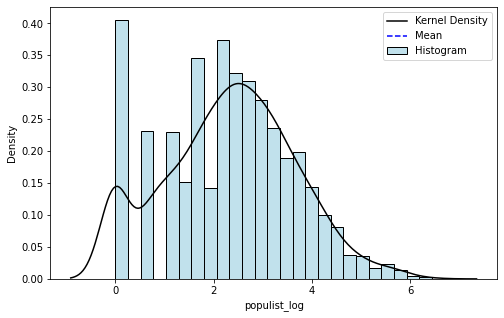

In [ ]:
# EDA OF POPULIST LOG VARIABLE

# Setting the dimensions of the figure
widthInInches = 8
heightInInches = 5
plt.figure(figsize=(widthInInches, heightInInches))
  
# Using the installed version of Seaborn.
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

# Creating a combined histogram and kernel density plot
kdeAxes = sns.kdeplot( analysis_17['populist_log'], color="black", label="Kernel Density")
sns.histplot( analysis_17['populist_log'], stat="density", color = "lightblue", label="Histogram", bins=25)

# Showing the mean on the figure
plt.axvline(analysis_17['populist_log'].mean(), color='blue', linestyle='dashed', label="Mean")

# Labelling and saving the figure
plt.legend()

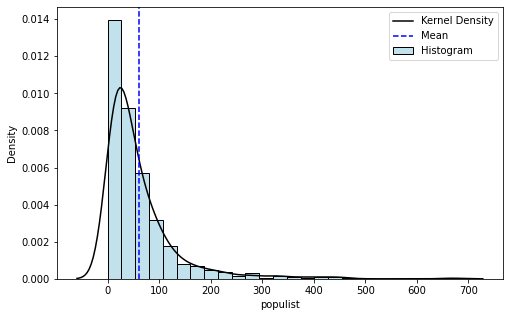

In [ ]:
# EDA OF POPULIST VARIABLE

# Setting the dimensions of the figure
widthInInches = 8
heightInInches = 5
plt.figure(figsize=(widthInInches, heightInInches))
  
# Using the installed version of Seaborn.
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

# Creating a combined histogram and kernel density plot
kdeAxes = sns.kdeplot( constituency_df['populist'], color="black", label="Kernel Density")
sns.histplot( constituency_df['populist'], stat="density", color = "lightblue", label="Histogram", bins=25)

# Showing the mean on the figure
plt.axvline( constituency_df['populist'].mean(), color='blue', linestyle='dashed', label="Mean")

# Labelling and saving the figure
plt.legend()

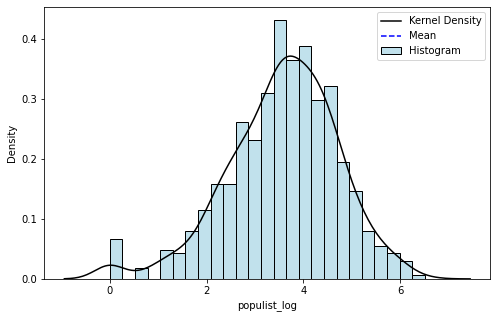

In [ ]:
# EDA OF POPULIST LOG VARIABLE

# Setting the dimensions of the figure
widthInInches = 8
heightInInches = 5
plt.figure(figsize=(widthInInches, heightInInches))
  
# Using the installed version of Seaborn.
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

# Creating a combined histogram and kernel density plot
kdeAxes = sns.kdeplot( constituency_df['populist_log'], color="black", label="Kernel Density")
sns.histplot( constituency_df['populist_log'], stat="density", color = "lightblue", label="Histogram", bins=25)

# Showing the mean on the figure
plt.axvline(constituency_df['populist_log'].mean(), color='blue', linestyle='dashed', label="Mean")

# Labelling and saving the figure
plt.legend()

In [ ]:
# How many politicians were detected as populist at least once?
print(analysis_17['populist_dummy'].value_counts(normalize=True))

# Roughly 17% of tweets by politicians in 2017 classified as populist by our model 

1.0    0.73441
0.0    0.26559
Name: populist_dummy, dtype: float64


In [ ]:
# Initial look at final df
analysis_17.describe(include='all')

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,username,name,constituency_name,constituency_type,party_name,count,retweet,like,votes,share,female,sitting_mp,former_mp,year,populist,populist_dummy,populist_log,voteshare,MoV
count,2229,2229,2229,2229,2229,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
unique,2224,2223,648,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BromleyGreens,Craig Martin,Maidenhead,County,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,2,8,1234,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.825482,105.079408,178.497084,11701.422611,0.186182,0.321669,0.238223,0.255271,2017.0,17.461193,0.734410,-inf,23.583737,24.603625
std,NaN,NaN,NaN,NaN,NaN,12.944730,3834.461241,6430.862602,11585.398724,0.389341,0.467222,0.426092,0.436112,0.0,38.592738,0.441746,NaN,22.823036,16.720530
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2017.0,0.000000,0.000000,-inf,0.010000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1243.000000,0.000000,0.000000,0.000000,0.000000,2017.0,0.000000,0.000000,NaN,2.480000,9.900000
50%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,7531.000000,0.000000,0.000000,0.000000,0.000000,2017.0,6.000000,1.000000,1.791759,14.940000,24.430000
75%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,20811.000000,0.000000,1.000000,0.000000,1.000000,2017.0,18.000000,1.000000,2.890372,43.620000,35.220000


In [ ]:
constituency_df.describe(include='all')

,constituency_name,constituency_type,MoV,populist,voteshare,winning_party,populist_log,competition
count,648,648,648.000000,648.000000,648.000000,648,648.000000,648
unique,648,2,NaN,NaN,NaN,9,NaN,3
top,Aberavon,County,NaN,NaN,NaN,Conservative,NaN,Moderate
freq,1,366,NaN,NaN,NaN,279,NaN,373
mean,NaN,NaN,23.900046,60.063272,52.014491,NaN,-inf,NaN
std,NaN,NaN,16.476521,72.314875,13.991838,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,1.210000,NaN,-inf,NaN
25%,NaN,NaN,9.312500,16.000000,46.625000,NaN,2.772589,NaN
50%,NaN,NaN,23.425000,38.000000,54.220000,NaN,3.637586,NaN
75%,NaN,NaN,34.802500,75.000000,60.682500,NaN,4.317488,NaN


In [ ]:
# How many politicians in our dataset have Twitter? 
2229/3304
# 67% of candidates in our sample had a twitter account in 2017. 

0.674636803874092

In [ ]:
# How many politicians in our dataset had at least one tweet detected as populist by our model? 
print(analysis_17['populist_dummy'].value_counts(normalize=True))

# 50% use populist rhetoric at least once! 

1.0    0.73441
0.0    0.26559
Name: populist_dummy, dtype: float64


In [ ]:
# How many politicians in our dataset are affiliated to each party?
print(analysis_17['party_name'].value_counts())

# Lots of tory, lib dem and labour candidates as expected
# Less UKIP, traditionally populist party, keep in mind

Labour                     483
Conservative               471
Liberal Democrat           448
Green                      339
Other                      151
UK Independence Party      124
Independent                 79
Scottish National Party     58
Labour and Co-operative     48
Plaid Cymru                 28
Name: party_name, dtype: int64


In [ ]:
# What proportion of each party's affiliated members tweeted something flagged as populist at least once? 
print(analysis_17.groupby('party_name')['populist_dummy'].value_counts(normalize=True))

party_name               populist_dummy
Conservative             1.0               0.636943
                         0.0               0.363057
Green                    1.0               0.769912
                         0.0               0.230088
Independent              1.0               0.683544
                         0.0               0.316456
Labour                   1.0               0.855072
                         0.0               0.144928
Labour and Co-operative  1.0               0.895833
                         0.0               0.104167
Liberal Democrat         1.0               0.705357
                         0.0               0.294643
Other                    1.0               0.695364
                         0.0               0.304636
Plaid Cymru              1.0               0.678571
                         0.0               0.321429
Scottish National Party  1.0               0.965517
                         0.0               0.034483
UK Independence Party   

In [ ]:
# Which parties had the largest total number of populist tweets affiliated to them?
pop_by_party = analysis_17.groupby('party_name')['populist'].sum()
pop_by_party = pop_by_party.reset_index()
pop_by_party = pop_by_party.sort_values(by='populist', ascending=False)

pop_by_party

,party_name,populist
3,Labour,13348.0
5,Liberal Democrat,7372.0
1,Green,4861.0
0,Conservative,3829.0
9,UK Independence Party,2678.0
4,Labour and Co-operative,1911.0
6,Other,1835.0
8,Scottish National Party,1520.0
2,Independent,1388.0
7,Plaid Cymru,179.0


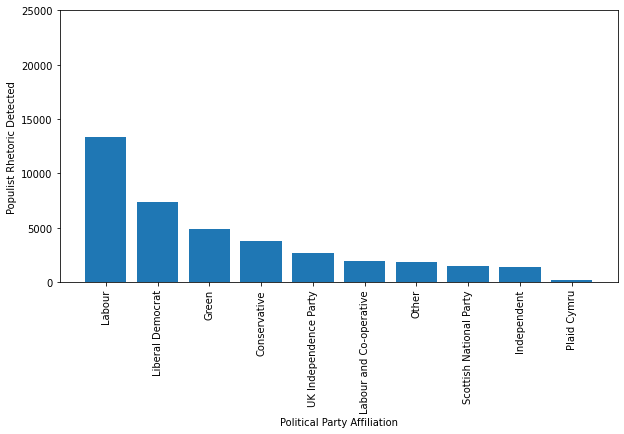

In [ ]:
parties = list(pop_by_party['party_name'])
populist_vals = list(pop_by_party['populist'])

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(parties, populist_vals)
 
plt.xlabel("Political Party Affiliation")
plt.ylabel("Populist Rhetoric Detected")

plt.yticks(np.arange(0, 30000, 5000)) 

plt.xticks(ticks=range(len(populist_vals)), labels=parties, rotation=90)
plt.show()

# Labour clearly in front #forthemanynotthefew a major factor? 
# LibDem and Green in front of Conservative -> Is this because of the different types of voters these parties are trying to reach? 

In [ ]:
# Which constituencies had the highest levels of populist rhetoric tweeted by political candidates?  
constit_by_party = analysis_17.groupby('constituency_name')['populist'].sum()
constit_by_party = constit_by_party.reset_index()
constit_by_party = constit_by_party.sort_values(by='populist', ascending=False)

constit_by_party # 1/2 constituencies that dont have any candidates on twitter? 
# Save to csv to make maps 
constit_by_party.to_csv('constit_by_party.csv')
!cp constit_by_party.csv "drive/My Drive/Diss_data"

In [ ]:
# Competitive or Safe
pop_by_competition = constituency_df.groupby('competition')['populist'].sum()
pop_by_competition = pop_by_competition.reset_index()
pop_by_competition = pop_by_competition.sort_values(by='populist', ascending=False)

pop_by_competition

,competition,populist
1,Moderate,21450.0
2,Safe,8759.0
0,Competitive,8712.0


In [ ]:
# Gender 
print(analysis_17['female'].value_counts(normalize=True))
print(analysis_17.groupby('female')['populist_dummy'].value_counts(normalize=True))

0    0.678331
1    0.321669
Name: female, dtype: float64
female  populist_dummy
0       1.0               0.715608
        0.0               0.284392
1       1.0               0.774059
        0.0               0.225941
Name: populist_dummy, dtype: float64


In [ ]:
# Sitting 
print(analysis_17['sitting_mp'].value_counts(normalize=True))
print(analysis_17.groupby('sitting_mp')['populist_dummy'].value_counts(normalize=True))

0    0.761777
1    0.238223
Name: sitting_mp, dtype: float64
sitting_mp  populist_dummy
0           1.0               0.706125
            0.0               0.293875
1           1.0               0.824859
            0.0               0.175141
Name: populist_dummy, dtype: float64


In [ ]:
# Former 
print(analysis_17['former_mp'].value_counts(normalize=True))
print(analysis_17.groupby('former_mp')['populist_dummy'].value_counts(normalize=True))

0    0.744729
1    0.255271
Name: former_mp, dtype: float64
former_mp  populist_dummy
0          1.0               0.702410
           0.0               0.297590
1          1.0               0.827768
           0.0               0.172232
Name: populist_dummy, dtype: float64


### **Stage 3: Bivariate Analyses**

In [ ]:
# Correlations of all variables without missing values remember
analysis_17.corr()

,count,retweet,like,votes,share,female,sitting_mp,former_mp,year,populist,populist_dummy,populist_log,voteshare,MoV
count,1.000000,0.164472,0.163387,-0.005472,-0.030597,0.061011,-0.014593,-0.000215,NaN,0.313337,0.097696,0.220988,-0.006277,0.059183
retweet,0.164472,1.000000,0.999823,0.053833,0.044087,-0.011511,0.042179,0.042315,NaN,0.342055,0.016108,0.084813,0.047919,0.046172
like,0.163387,0.999823,1.000000,0.054172,0.044502,-0.011609,0.041816,0.042374,NaN,0.342378,0.016167,0.084696,0.048183,0.046862
votes,-0.005472,0.053833,0.054172,1.000000,0.755548,0.061685,0.751658,0.755480,NaN,0.091061,0.135250,0.059745,0.977930,-0.012905
share,-0.030597,0.044087,0.044502,0.755548,1.000000,0.025926,0.752507,0.727090,NaN,0.108241,0.115398,0.064271,0.760674,0.176505
female,0.061011,-0.011511,-0.011609,0.061685,0.025926,1.000000,0.000437,-0.008876,NaN,0.036325,0.061821,0.041049,0.064801,-0.010151
sitting_mp,-0.014593,0.042179,0.041816,0.751658,0.752507,0.000437,1.000000,0.955160,NaN,0.087345,0.114526,0.052413,0.769262,-0.021216
former_mp,-0.000215,0.042315,0.042374,0.755480,0.727090,-0.008876,0.955160,1.000000,NaN,0.093032,0.123759,0.062411,0.770168,-0.039602
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
populist,0.313337,0.342055,0.342378,0.091061,0.108241,0.036325,0.087345,0.093032,NaN,1.000000,0.272146,0.686397,0.103772,0.078299


In [ ]:
constituency_df.corr()

,MoV,populist,voteshare,populist_log
MoV,1.000000,0.181548,0.512944,0.145426
populist,0.181548,1.000000,0.194227,0.771101
voteshare,0.512944,0.194227,1.000000,0.227716
populist_log,0.145426,0.771101,0.227716,1.000000
